## Linear Regression with One Variable

This section covers the R implementation of single variable linear regression corresponding to the first part of ex1.

Recall that the file ex1data1.txt contains two columns of data: the first column corresponds to the populations of cities and the second column contains the profit of food trucks in those cities. 

### Load the data into a table

The data.frame datatype is now the preferred datatype for most data analysis and machine learning tasks in R. In this script we will use data.frame instead of vectors and matrices. A data.frame consists of rows and columns where each column corresponds to a variable, and each row corresponds to an observation. 

Run the code below to:

* Read the profit data into a table using the readtable function
* Add descriptive names to the table variables
* Observe first few rows of data
* Compute summary statistics on each variable

In [6]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [7]:
data <- read.table('ex1data1.txt', sep=',')
colnames(data) <- c('Population','Profit')
print(head(data))
print(summary(data))

  Population  Profit
1     6.1101 17.5920
2     5.5277  9.1302
3     8.5186 13.6620
4     7.0032 11.8540
5     5.8598  6.8233
6     8.3829 11.8860
   Population         Profit      
 Min.   : 5.027   Min.   :-2.681  
 1st Qu.: 5.708   1st Qu.: 1.987  
 Median : 6.589   Median : 4.562  
 Mean   : 8.160   Mean   : 5.839  
 3rd Qu.: 8.578   3rd Qu.: 7.047  
 Max.   :22.203   Max.   :24.147  


Use the ?data.frame to view descriptions for working with data.frame variables displayed above.

## Fit a linear model using the lm function
There are many functions available in the Statistics and Machine Learning Toolbox for fitting a model to data. To fit a linear regression model to the data in our table, we'll use the lm function. As we will see, there is no need to add a column of ones to the data for a bias term, to create a separate cost function, or to implement gradient descent to converge on the model parameters as in ex1- these tasks are automatically taken care of by lm. The output of lm is a LinearModel variable which contains all of the information about the model. 

Run the code in this section to fit the linear model. The model coefficients ($\theta$) are extracted from the model variable and printed out for you below- compare to your results from ex1. After running, double-click on the variable linMdl in the Global Environment to examine its properties further. Variable properties can also be extracted and displayed using the '$' operator, as in the code below used to extract the Coefficients property. The result is a table of the model coefficients and additional statistical information.

In [8]:
linMdl <- lm(Profit~Population, data=data);
print(summary(linMdl))
theta <- linMdl$coefficients
cat('Theta computed by fitlm: [', theta[1], ', ', theta[2], ']')


Call:
lm(formula = Profit ~ Population, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8540 -1.9686 -0.5407  1.5360 14.1982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.89578    0.71948  -5.415 4.61e-07 ***
Population   1.19303    0.07974  14.961  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.024 on 95 degrees of freedom
Multiple R-squared:  0.702,	Adjusted R-squared:  0.6989 
F-statistic: 223.8 on 1 and 95 DF,  p-value: < 2.2e-16

Theta computed by fitlm: [ -3.895781 ,  1.193034 ]

### Making predictions using the LinearModel variable
Below we use the predict function to predict profit for different populations using the model trained in the previous section. Note that the first input to predict is a trained model variable, while the second input is a feature value or list of values in the form of a vector, matrix or table. Run the code in this section and compare with your results from ex1.

For population = 35,000, we predict a profit of  2798.369For population = 70,000, we predict a profit of  44554.55

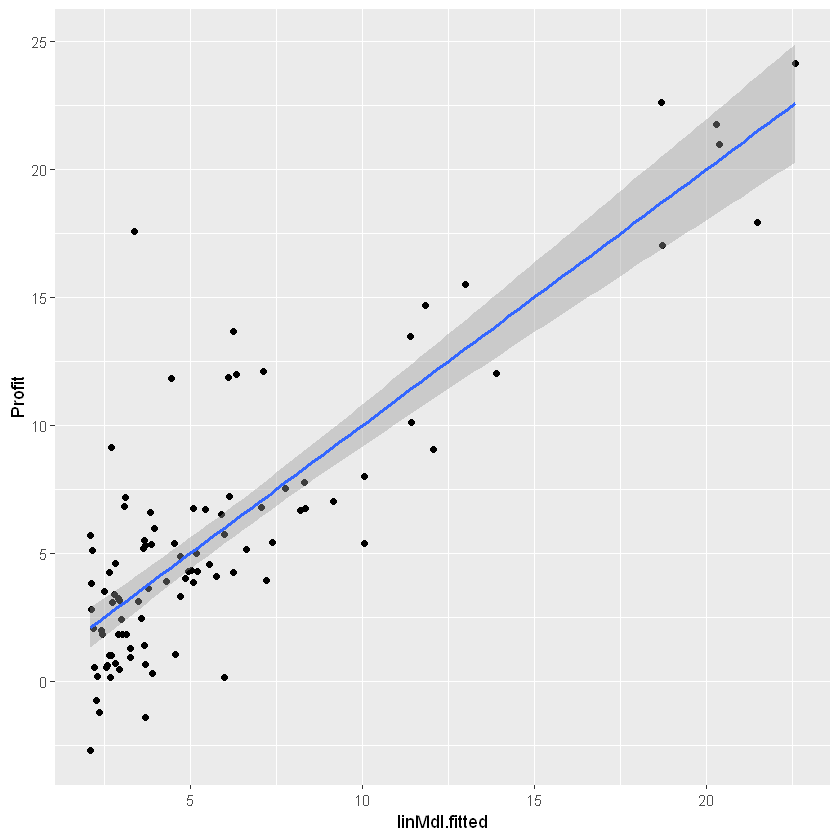

In [9]:
# Predict values for population sizes of 35,000 and 70,000
predict1 <- predict(linMdl,data.frame("Population"=3.5));
cat('For population = 35,000, we predict a profit of ', predict1*10000);

predict2 = predict(linMdl, data.frame("Population"=7));
cat('For population = 70,000, we predict a profit of ', predict2*10000);

# Plot the linear fit
linMdl.fitted <- fitted.values(linMdl)

ggplot(data, aes(x=linMdl.fitted, y=Profit)) +
    geom_point(shape=16) +
    geom_smooth(method=lm)

## Linear Regression with Multiple Variables

### Load and preview the data

Recall that the file ex1data2.txt contains a training set of housing prices in Portland, Oregon. Each row corresponds to a house where the element in the first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. Run this section to load the data into a table. After a table is displayed as output you can perform basic sort and filter operations on a given columns as follows:

* Hover the mouse pointer over the desired variable name (column heading)
* Click on the down arrow when it appears
* Choose the desired sort option to sort all rows in the table based on the value in that variable OR
* Enter a specific range in the boxes provided to select only rows whose value for the selected variable falls inside that range
* The MATLAB code required to perform 3 and/or 4 is automatically displayed below the table. If desired, the code can be copied to the clipboard or added to the script using the 'Copy' and 'Update' code buttons.


After running this section, experiment with sorting and filtering the data table below. (Since we want to use all the observations in data, there is no need to copy the code or add it to the script.)

In [10]:
data <- read.table('ex1data2.txt', sep=',')
colnames(data) <- c('Size', 'Bedrooms', 'Price')
print(head(data))
print(summary(data))

  Size Bedrooms  Price
1 2104        3 399900
2 1600        3 329900
3 2400        3 369000
4 1416        2 232000
5 3000        4 539900
6 1985        4 299900
      Size         Bedrooms        Price       
 Min.   : 852   Min.   :1.00   Min.   :169900  
 1st Qu.:1432   1st Qu.:3.00   1st Qu.:249900  
 Median :1888   Median :3.00   Median :299900  
 Mean   :2001   Mean   :3.17   Mean   :340413  
 3rd Qu.:2269   3rd Qu.:4.00   3rd Qu.:384450  
 Max.   :4478   Max.   :5.00   Max.   :699900  


## Fit a linear model using fitlm and estimate housing prices
The lm function can be used to fit a regression model with multiple variables as well. A different response variable can be specified, if desired- see the lm documentation for more information. Run this section to fit a linear model, display the model the coefficients, and predict the price of a 1650 sqft, 3-bedroom house. Compare with your results from ex1.

In [12]:
linMdl <- lm(Price~Size+Bedrooms, data=data);
print(summary(linMdl))
theta <- linMdl$coefficients
cat('Theta computed by fitlm: [', theta[1], ', ', theta[2], ']')


Call:
lm(formula = Price ~ Size + Bedrooms, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-130582  -43636  -10829   43698  198147 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  89597.9    41767.4   2.145   0.0375 *  
Size           139.2       14.8   9.409 4.22e-12 ***
Bedrooms     -8738.0    15450.7  -0.566   0.5746    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66070 on 44 degrees of freedom
Multiple R-squared:  0.7329,	Adjusted R-squared:  0.7208 
F-statistic: 60.38 on 2 and 44 DF,  p-value: 2.428e-13

Theta computed by fitlm: [ 89597.91 ,  139.2107 ]

In [13]:
price <- predict(linMdl, data.frame("Size" = 1650, "Bedrooms" = 3))
cat('Predicted price of a 1650 sq-ft, 3 br house: $', price);

Predicted price of a 1650 sq-ft, 3 br house: $ 293081.5